In [1]:
import pandas as pd

In [3]:
dataset=pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [5]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [6]:
dependent=dataset[['charges']]
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)
x_train,x_test,y_train,y_test

(      age     bmi  children  sex_male  smoker_yes
 1163   18  28.215         0         0           0
 196    39  32.800         0         0           0
 438    52  46.750         5         0           0
 183    44  26.410         0         0           0
 1298   33  27.455         2         1           0
 ...   ...     ...       ...       ...         ...
 763    27  26.030         0         1           0
 835    42  35.970         2         1           0
 1216   40  25.080         0         1           0
 559    19  35.530         0         1           0
 684    33  18.500         1         0           0
 
 [936 rows x 5 columns],       age     bmi  children  sex_male  smoker_yes
 578    52  30.200         1         1           0
 610    47  29.370         1         0           0
 569    48  40.565         2         1           1
 1034   61  38.380         0         1           0
 198    51  18.050         0         0           0
 ...   ...     ...       ...       ...         ...
 1261

In [98]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='squared_error',splitter='best',max_features='sqrt')
regressor.fit(x_train,y_train)

DecisionTreeRegressor(max_features='sqrt')

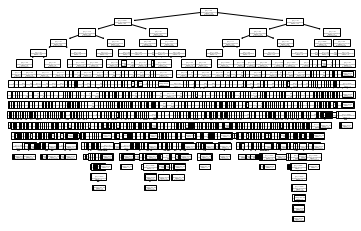

In [86]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [99]:
y_pred=regressor.predict(x_test)
y_pred

array([ 9910.35985 ,  8930.93455 , 44202.6536  , 12981.3457  ,
        9264.797   , 21984.47061 ,  1615.7667  , 10848.1343  ,
        7281.5056  ,  5253.524   ,  4766.022   , 10156.7832  ,
        6849.026   ,  4571.41305 , 18246.4955  , 11015.1747  ,
       12142.5786  ,  3292.52985 ,  6748.5912  , 33750.2918  ,
       47462.894   , 13430.265   ,  8988.15875 , 24393.6224  ,
        2250.8352  ,  4076.497   ,  3176.8159  ,  8538.28845 ,
        3757.8448  ,  8027.968   ,  7954.517   , 48673.5588  ,
       12741.16745 ,  9144.565   , 18033.9679  ,  3554.203   ,
        8733.22925 , 38711.      , 36021.0112  ,  1391.5287  ,
        5266.3656  ,  3062.50825 , 17904.52705 , 43813.8661  ,
       37133.8982  ,  3579.8287  , 11015.1747  ,  6389.37785 ,
        4719.52405 , 10942.13205 , 13126.67745 ,  4466.6214  ,
       21978.6769  , 46661.4424  , 11093.6229  , 19673.33573 ,
        2497.0383  ,  8442.667   , 10096.97    , 13937.6665  ,
        1252.407   , 46130.5265  , 15161.5344  , 25333.

In [100]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

0.740882372323597